# Assignment 3 - Client's product (bank term deposit) subscribtions based on marketing campaigns dataset


Nama            :   Jasmine Nur Ramadhani

Kelas           :   PYTN-KS20

Kode Peserta    :   PYTN-KS20-016

Program         :   Hactiv8 - Introduction to Python for Data Science


## Dataset information

Source: https://archive.ics.uci.edu/dataset/222/bank+marketing

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets:

- bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010).
- bank-additional.csv with 10% of the examples (4119), randomly selected from, and 20 inputs.
- bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
- bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

- Input variables:
  - bank client data:
   1. age (numeric)
   2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4. education (categorical: "unknown","secondary","primary","tertiary")
   5. default: has credit in default? (binary: "yes","no")
   6. housing: has housing loan? (binary: "yes","no")
   7. loan: has personal loan? (binary: "yes","no")

  - related with the last contact of the current campaign:
   8. contact: contact communication type (categorical: "unknown","telephone","cellular") 
   9. day: last contact day of the month (numeric)
  10. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  11. duration: last contact duration, in seconds (numeric)

  - other attributes:
  12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  14. previous: number of contacts performed before this campaign and for this client (numeric)
  15. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
  
  - social and economic context attributes
  16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17. cons.price.idx: consumer price index - monthly indicator (numeric)
  18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
  19. euribor3m: euribor 3 month rate - daily indicator (numeric)
  20. nr.employed: number of employees - quarterly indicator (numeric)
  - Output variable (desired target):
  21. y - has the client subscribed a term deposit? (binary: "yes","no")

## About Project

Tujuan dari project adalah untuk memilih algoritma terbaik dari 6 algoritma, yaitu Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Decision Tree, Random Forest, Naive Bayes.

Data yang digunakan dalam project ini adalah:
- Dataset `bank-additional-full.csv` yang akan digunakan untuk ekplorasi data dan final model training setelah algoritma terpilih.
- Dataset `bank-additional.csv` yang akan digunakan untuk model training dan evaluasi model.

# Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

from imblearn.under_sampling import RandomUnderSampler as RUS
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Data Loading and Detail of Dataset

In [2]:
# Memanggil dataset
df1 = pd.read_csv("dataset/bank-additional-full.csv")    # for initial exploration and final training
df2 = pd.read_csv("dataset/bank-additional.csv")    # for model training and evaluating model

print ("Jumlah sample data df1 (full): ",len(df1))
print ("Jumlah sample data df2 (part): ",len(df2))

Jumlah sample data df1 (full):  41188
Jumlah sample data df2 (part):  4119


In [3]:
# Mengetahui jumlah baris dan kolom 
print("Baris df1: ", df1.shape[0])  # ukuran baris
print("Kolom df1: ", df1.shape[1])  # ukuran kolom
print("==========")
print("Baris df2: ", df2.shape[0])  # ukuran baris
print("Kolom df2: ", df2.shape[1])  # ukuran kolom

Baris df1:  41188
Kolom df1:  21
Baris df2:  4119
Kolom df2:  21


In [4]:
# Untuk mengetahui dimensi 
print("Dataset berdimensi: ", df1.ndim)

Dataset berdimensi:  2


In [5]:
# Menampilkan 5 baris teratas dengan .head()
pd.set_option("display.max.columns", None)     # Displaying maximum column
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# Menampilkan 5 baris terbawah
df1.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [7]:
# Mengembalikan label setiap kolom dari dataframe
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Didapatkan informasi bahwa dataset memiliki 21 fitur/kolom dan 41188 baris untuk df1 (full) dan memiliki 4119 baris untuk df2(part).

# Data Cleaning

## For df1 (full)

In [9]:
df1.isnull().values.any()

False

tidak terdapat missing values

In [10]:
print(df1.duplicated().values.any())
print(df1.duplicated().sum())

True
12


benar terdapat data duplikat dan berjumlah 12 maka akan di-drop salah satunya

In [11]:
print("Before dropping duplicates:", df1.shape)

# Drop duplicates based on all columns
df1 = df1.drop_duplicates(keep='first')

# Display the shape of the DataFrame after dropping duplicates
print("After dropping duplicates:", df1.shape)
print(df1.duplicated().sum())

Before dropping duplicates: (41188, 21)
After dropping duplicates: (41176, 21)
0


maka setelah proses dropping data duplikat dengan membiarkan data 'first' atau pertamanya, baris pada `df1` berkurang dari 41188 menjadi 41176.

## For df2 (part)

In [12]:
df2.isnull().values.any()

False

In [13]:
print(df2.duplicated().values.any())
print(df2.duplicated().sum())

False
0


pada `df2` tidak terdapat missing value maupun data duplikat

# Visualization

In [14]:
# Menghitung jumlah yes dan no pada kolom y
df1.groupby('y').size()

y
no     36537
yes     4639
dtype: int64

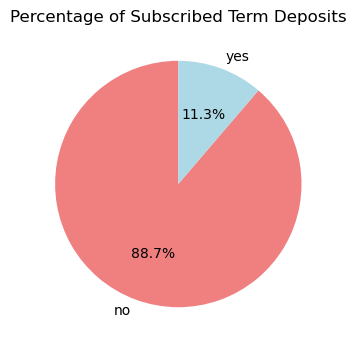

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each unique value in the 'y' column
y_counts = df1['y'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(4, 4))
plt.pie(y_counts, labels=y_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], startangle=90)
plt.title('Percentage of Subscribed Term Deposits') # Adding a title
plt.show()


Berdasarkan visualisasi di atas, diketahui bahwa 11.3% (4639) memilih mengikuti deposito berjangka bank dan 88.7% (36537) lainnya memilih tidak mengikuti.

## Grouping Categorical and Numerical Features

In [16]:
categorical_ft = [column for column in df1.columns if df1[column].dtype == "O"]
print("Numbers of Categorical Features: {}".format(len(categorical_ft)))
print("Categorical Features: ",categorical_ft)

Numbers of Categorical Features: 11
Categorical Features:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


Ada sebanyak 11 fitur kategorikal, yaitu `'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'`. 

Selanjutnya, kita akan melihat kardinalitas dari fitur-fitur kategorikal

In [17]:
df1[categorical_ft].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [18]:
# Grouping untuk fitur-fitur dengan tipe data selain object
numerical_ft = [column for column in df1.columns if df1[column].dtype != "O"]
print("Number of Numerical Features: {}".format(len(numerical_ft)))
print("Numerical Features: ",numerical_ft)

Number of Numerical Features: 10
Numerical Features:  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


Ada sebanyak 10 fitur kategorikal, yaitu `'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'`

## Cardinality & Unique Values

Selanjutnya akan dicek kardinalitas dan unique values dari fitur-fitur kategorikal

In [19]:
for each_feature in categorical_ft:
   unique_values = len(df1[each_feature].unique())
   print("Cardinality of {} are: {}".format(each_feature, unique_values))

Cardinality of job are: 12
Cardinality of marital are: 4
Cardinality of education are: 8
Cardinality of default are: 3
Cardinality of housing are: 3
Cardinality of loan are: 3
Cardinality of contact are: 2
Cardinality of month are: 10
Cardinality of day_of_week are: 5
Cardinality of poutcome are: 3
Cardinality of y are: 2


In [20]:
# Mengidentifikasi unique values untuk categorical features
for column in categorical_ft :
    print(f"Unique values for {column}: {df1[column].unique()}")

Unique values for job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Unique values for marital: ['married' 'single' 'divorced' 'unknown']
Unique values for education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Unique values for default: ['no' 'unknown' 'yes']
Unique values for housing: ['no' 'yes' 'unknown']
Unique values for loan: ['no' 'yes' 'unknown']
Unique values for contact: ['telephone' 'cellular']
Unique values for month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Unique values for day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
Unique values for poutcome: ['nonexistent' 'failure' 'success']
Unique values for y: ['no' 'yes']


In [21]:
df1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Age Count Distribution

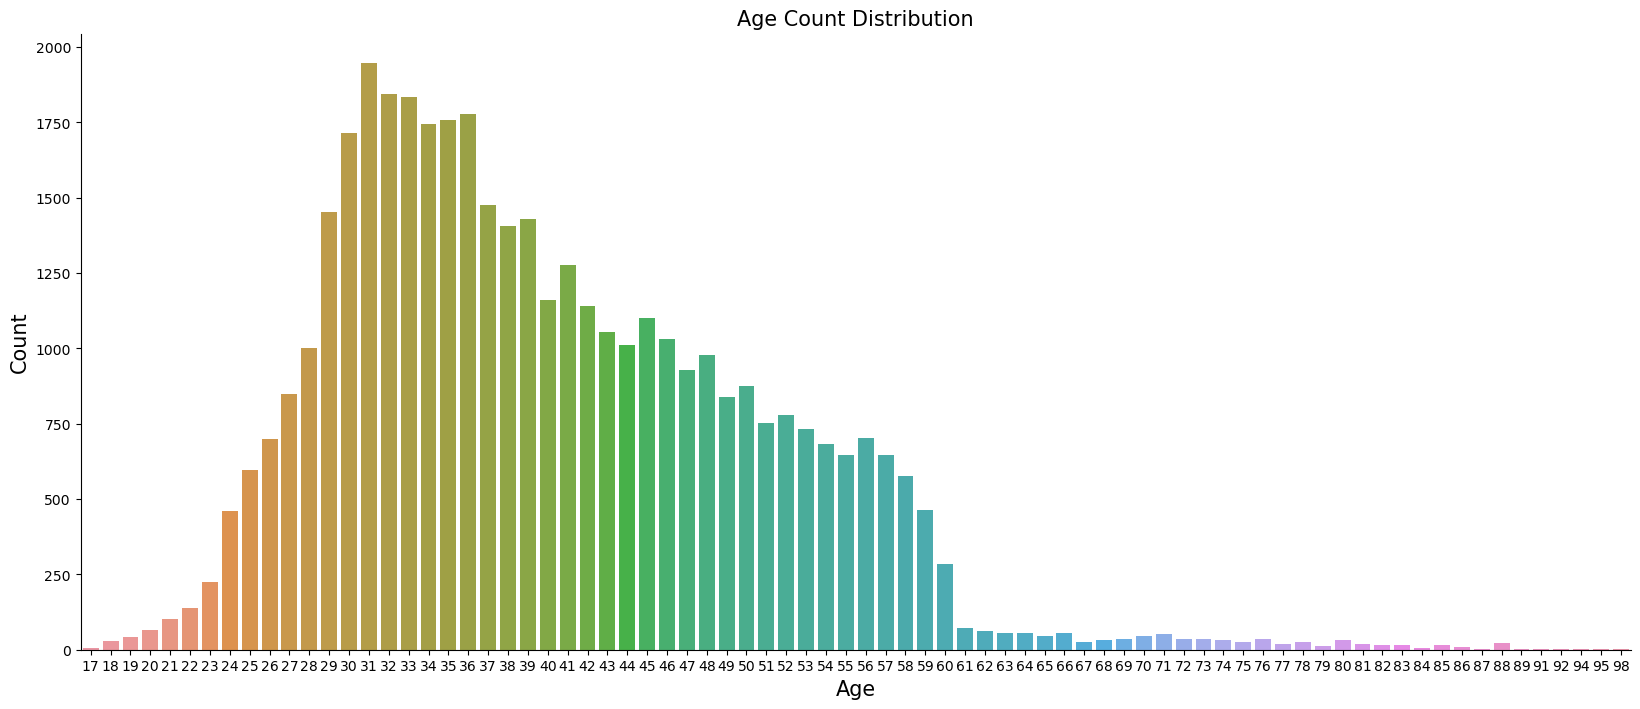

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data =  df1[numerical_ft])
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

Usia rata-rata dari nasabah adalah 40.02380 &asymp; 40, dengan usia termuda 17 tahun dan usia tertua 98 tahun.

## Duration for Subscription Decision

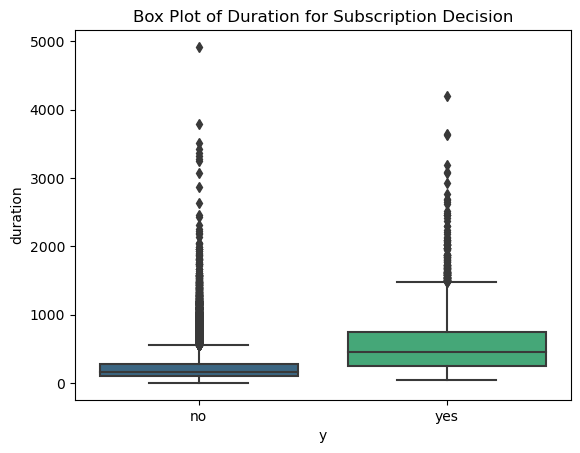

In [23]:
sns.boxplot(x='y', y='duration', data=df1, palette='viridis')
plt.title('Box Plot of Duration for Subscription Decision')
plt.show()

In [24]:
df1.groupby('y')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,36537.0,220.868079,207.116178,0.0,95.0,164.0,279.0,4918.0
yes,4639.0,553.256090,401.190736,37.0,253.5,449.0,741.5,4199.0


Berdasarkan visualisasi box plot dan statistik deskriptif variabel `'duration'` diketahui:
- Pada kelas `no`, rata-rata durasi telepon terakhir dari nasabah yang memilih untuk tidak mengikuti deposito berjangka bank adalah 220.868079
- Pada kelas `yes`, rata-rata durasi telepon terakhir dari nasabah yang memilih untuk mengikuti deposito berjangka bank adalah 553.256090	

## Job 

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by 'job' and 'y', then count the occurrences
job_subs = df1.groupby(['job', 'y']).size().unstack()
job_subs = job_subs.sort_values(by='yes', ascending=False)

job_subs

y,no,yes
job,,
admin.,9068,1351
technician,6009,730
blue-collar,8615,638
retired,1284,434
management,2596,328
services,3644,323
student,600,275
self-employed,1272,149
unemployed,870,144


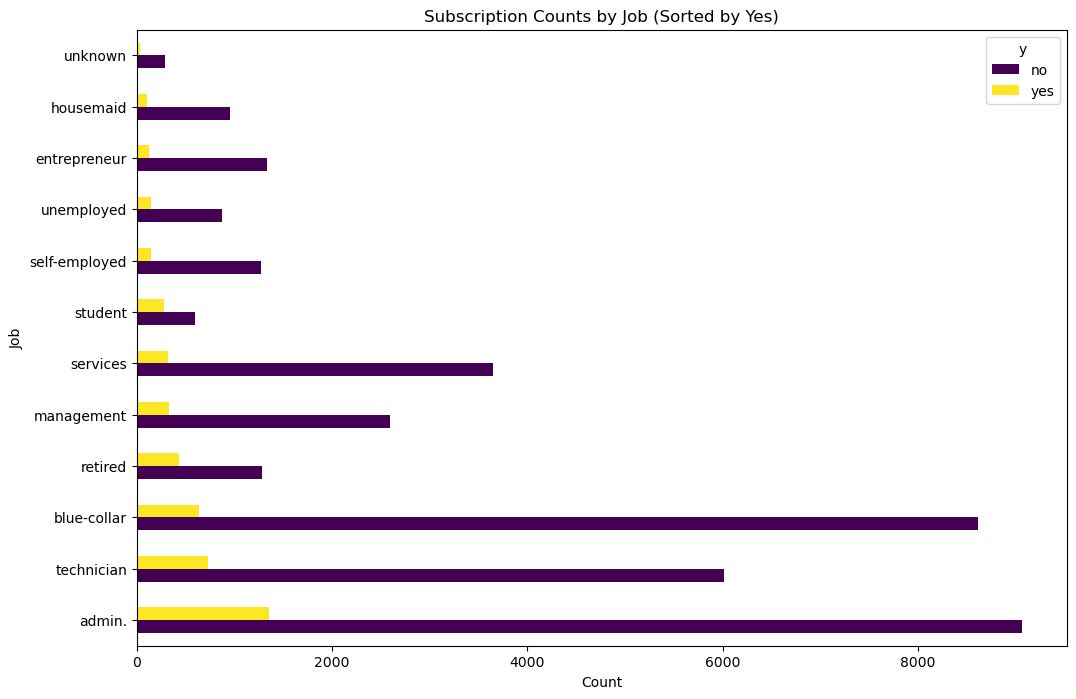

In [26]:
# Plotting a horizontal bar plot
job_subs.plot(kind='barh', stacked=False, colormap='viridis', figsize=(12, 8))

# Adding labels and title
plt.title('Subscription Counts by Job (Sorted by Yes)')
plt.xlabel('Count')
plt.ylabel('Job')

# Show the plot
plt.show()

Pekerjaan yang paling banyak memilih untuk mengikuti deposito berjangka bank (bank term deposit subscriptions) adalah
- admin dengan `no`	9068 dan `yes` 1351
- technician `no` 6009 `yes` 730
- blue-collar `no` 8615	`yes` 638

# Data Preprocessing

Sebelumnya ubah nilai fitur categorical mendjadi numerical label

In [27]:
df2['y'].unique()

array(['no', 'yes'], dtype=object)

In [28]:
# Mengubah nilai dari "Yes" dan "No" menjadi 1 atau 0 pada data full df1
df1['y'] = df1['y'].replace({'no': 0, 'yes': 1})

# Mengubah nilai dari "Yes" dan "No" menjadi 1 atau 0 pada data full df2
df2['y'] = df2['y'].replace({'no': 0, 'yes': 1})

In [29]:
df2['y'].unique()

array([0, 1], dtype=int64)

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

cat_ft = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                                 'contact', 'month', 'day_of_week', 'poutcome']

# Mengubah non-numerical label menjadi numerical label
for column in cat_ft:
    df1[column] = label_encoder.fit_transform(df1[column])
    df2[column] = label_encoder.fit_transform(df2[column])

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int32  
 2   marital         41176 non-null  int32  
 3   education       41176 non-null  int32  
 4   default         41176 non-null  int32  
 5   housing         41176 non-null  int32  
 6   loan            41176 non-null  int32  
 7   contact         41176 non-null  int32  
 8   month           41176 non-null  int32  
 9   day_of_week     41176 non-null  int32  
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  int32  
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [31]:
print(df2['y'].unique())

print(df1['y'].unique())

[0 1]
[0 1]


In [32]:
df2.sample()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
735,30,9,2,6,0,2,0,0,1,1,14,13,999,0,1,1.4,93.444,-36.1,4.965,5228.1,0


# Logistic Regression

In [33]:
df2['y'].value_counts()

y
0    3668
1     451
Name: count, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.utils import resample

In [35]:
# X contains features and y contains the target variable
X = df2.drop('y', axis=1)
y = df2['y']

# Split the dataset into training and testing sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the class distribution before resampling
print("Class distribution before resampling:")
print(pd.Series(y_train_lr).value_counts())

# Upsample the minority class using resample
X_train_min_up, y_train_min_up = resample(X_train_lr[y_train_lr == 1],
                                            y_train_lr[y_train_lr == 1],
                                            replace=True,
                                            n_samples=X_train_lr[y_train_lr == 0].shape[0],
                                            random_state=42)

# Combine the upsampled minority class with the majority class
X_train_lr = pd.concat([X_train_lr, X_train_min_up])
y_train_lr = pd.concat([y_train_lr, y_train_min_up])

# Standardize features
scaler = StandardScaler()
X_train_lr = scaler.fit_transform(X_train_lr)
X_test_lr = scaler.transform(X_test_lr)

# Display the class distribution after resampling
print("\nClass distribution after resampling:")
print(pd.Series(y_train_lr).value_counts())


Class distribution before resampling:
y
0    2936
1     359
Name: count, dtype: int64

Class distribution after resampling:
y
1    3295
0    2936
Name: count, dtype: int64


In [36]:
# Initialize and train the model 
model_logreg = LogisticRegression(random_state=42)
model_logreg.fit(X_train_lr, y_train_lr)

# Make predictions on the test set
y_pred_lr = model_logreg.predict(X_test_lr)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.84      0.90       732
           1       0.40      0.86      0.55        92

    accuracy                           0.84       824
   macro avg       0.69      0.85      0.73       824
weighted avg       0.91      0.84      0.86       824

Logistic Regression Model Evaluation:
Accuracy: 0.8410194174757282
Precision: 0.4010152284263959
Recall: 0.8586956521739131
F1 Score: 0.5467128027681661


Text(33.22222222222222, 0.5, 'Actual class')

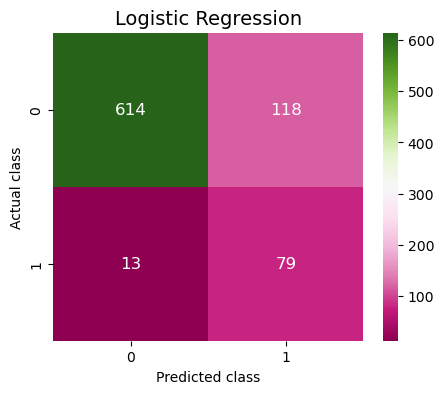

In [37]:
# Evaluate the model
accuracy_logreg = accuracy_score(y_test_lr, y_pred_lr)
classification_report_logistic = classification_report(y_test_lr, y_pred_lr)
precision_logreg = precision_score(y_test_lr, y_pred_lr)
recall_logreg = recall_score(y_test_lr, y_pred_lr)
f1_logreg = f1_score(y_test_lr, y_pred_lr)

print(f"Classification Report for Logistic Regression:\n{classification_report_logistic}")

# Display Logistic Regression model evaluation metrics
print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print("F1 Score:", f1_logreg)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_lr, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="PiYG", annot_kws={"fontsize":12})
plt.title("Logistic Regression", fontsize=14)
plt.xlabel("Predicted class")
plt.ylabel("Actual class")

Dari heatmap confusion matrix didapatkan:
- True Negative = 614 (diprediksi tidak akan mengikuti dan benar tidak mengikuti) 
- False Negative = 13 (diprediksi tidak akan mengikuti akan tetapi mengikuti (subscribed)) 
- True Positive = 79 (diprediksi akan mengikuti (subscribed) dan benar mengikuti (subscribed)) 
- False Positive = 118  (diprediksi akan mengikuti (subscribed) akan tetapi tidak mengikuti)

Dan didapatkan nilai f1-score untuk kelas positif `1` atau `"yes"` adalah 0.55.

# K-Nearest Neighbors

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler as RUS
from imblearn.pipeline import make_pipeline

In [39]:
# X and y are feature and target variables
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_knn = scaler.fit_transform(X_train_knn)
X_test_knn = scaler.transform(X_test_knn)

In [40]:
# Example using RUS for over-sampling
knn_model = make_pipeline(RUS(), KNeighborsClassifier(n_neighbors=5))
knn_model.fit(X_train_knn, y_train_knn)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_knn)


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       732
           1       0.37      0.76      0.50        92

    accuracy                           0.83       824
   macro avg       0.67      0.80      0.70       824
weighted avg       0.90      0.83      0.85       824

Logistic Regression Model Evaluation:
Accuracy: 0.8276699029126213
Precision: 0.3684210526315789
Recall: 0.7608695652173914
F1 Score: 0.4964539007092198


Text(33.22222222222222, 0.5, 'Actual class')

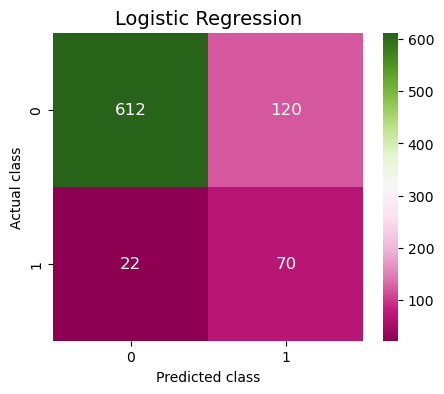

In [41]:
# Evaluate the model
print(f"Classification Report for Logistic Regression:\n{classification_report(y_test_knn, y_pred_knn)}")

# Display Logistic Regression model evaluation metrics
print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_knn, y_pred_knn)}")
print(f"Precision: {precision_score(y_test_knn, y_pred_knn)}")
print(f"Recall: {recall_score(y_test_knn, y_pred_knn)}")
print(f"F1 Score: {f1_score(y_test_knn, y_pred_knn)}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test_knn, y_pred_knn)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="PiYG", annot_kws={"fontsize":12})
plt.title("Logistic Regression", fontsize=14)
plt.xlabel("Predicted class")
plt.ylabel("Actual class")

Dari heatmap confusion matrix didapatkan:
- True Negative = 606 (diprediksi tidak akan mengikuti dan benar tidak mengikuti) 
- False Negative = 27 (diprediksi tidak akan mengikuti akan tetapi mengikuti (subscribed)) 
- True Positive = 65 (diprediksi akan mengikuti (subscribed) dan benar mengikuti (subscribed)) 
- False Positive = 126  (diprediksi akan mengikuti (subscribed) akan tetapi tidak mengikuti)

Dan didapatkan nilai f1-score untuk kelas positif `1` atau `"yes"` adalah 0.46.

# Support Vector Machine (SVM)

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# Create a train-test split on the subsample
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.2, random_state=42)

# Upsample the minority class using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_svm, y_train_svm = ros.fit_resample(X_train_svm, y_train_svm)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test sets
X_train_svm = scaler.fit_transform(X_train_svm)
X_test_svm = scaler.transform(X_test_svm)

In [43]:
# Create an SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model on the subsample
svm_model.fit(X_train_svm, y_train_svm)

y_pred_svm = svm_model.predict(X_test_svm)

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.98      0.84      0.90       732
           1       0.40      0.85      0.54        92

    accuracy                           0.84       824
   macro avg       0.69      0.84      0.72       824
weighted avg       0.91      0.84      0.86       824

KNN Model Evaluation:
Accuracy: 0.8385922330097088
Precision: 0.39593908629441626
Recall: 0.8478260869565217
F1 Score: 0.5397923875432526


Text(33.22222222222222, 0.5, 'Actual class')

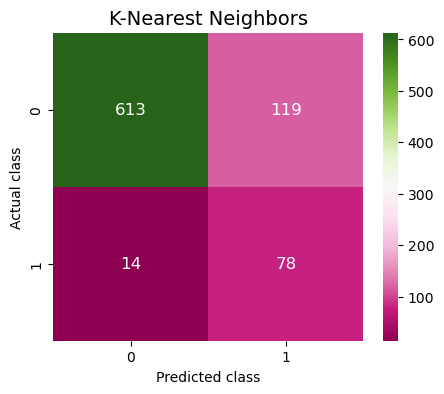

In [44]:
# Evaluate the model
print(f"Classification Report for KNN:\n{classification_report(y_test_svm, y_pred_svm)}")

# Display Logistic Regression model evaluation metrics
print("KNN Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_svm, y_pred_svm)}")
print(f"Precision: {precision_score(y_test_svm, y_pred_svm)}")
print(f"Recall: {recall_score(y_test_svm, y_pred_svm)}")
print(f"F1 Score: {f1_score(y_test_svm, y_pred_svm)}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test_svm, y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="PiYG", annot_kws={"fontsize":12})
plt.title("K-Nearest Neighbors", fontsize=14)
plt.xlabel("Predicted class")
plt.ylabel("Actual class")

Dari heatmap confusion matrix didapatkan:
- True Negative = 613 (diprediksi tidak akan mengikuti dan benar tidak mengikuti) 
- False Negative = 14 (diprediksi tidak akan mengikuti akan tetapi mengikuti (subscribed)) 
- True Positive = 78 (diprediksi akan mengikuti (subscribed) dan benar mengikuti (subscribed)) 
- False Positive = 119  (diprediksi akan mengikuti (subscribed) akan tetapi tidak mengikuti)

Dan didapatkan nilai f1-score untuk kelas positif `1` atau `"yes"` adalah 0.54.

# Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
# Split the data into training and testing sets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {'max_depth': [None, 5, 10, 15],
                'criterion': ['gini', 'entropy'],
                'splitter': ['best', 'random'],
                'class_weight': [None, 'balanced', {0: 1, 1: 10}],
                'random_state': [42],
                'min_impurity_decrease': [0.0, 0.1, 0.2]}

from sklearn.model_selection import GridSearchCV

dt_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_dt, y_train_dt)

best_dt_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_

print(best_dt_params)
print(best_dt_model)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'min_impurity_decrease': 0.0, 'random_state': 42, 'splitter': 'best'}
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, random_state=42)


In [47]:
# Create a Decision Tree model
dt_model = DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                                    max_depth=5, random_state=42)

# Train the model on the upsampled training data
dt_model.fit(X_train_dt, y_train_dt)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test_dt)

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.99      0.83      0.90       732
           1       0.40      0.91      0.55        92

    accuracy                           0.83       824
   macro avg       0.69      0.87      0.73       824
weighted avg       0.92      0.83      0.86       824

Decision Tree Model Evaluation:
Accuracy: 0.8349514563106796
Precision: 0.39622641509433965
Recall: 0.9130434782608695
F1 Score: 0.5526315789473684


Text(33.22222222222222, 0.5, 'Actual class')

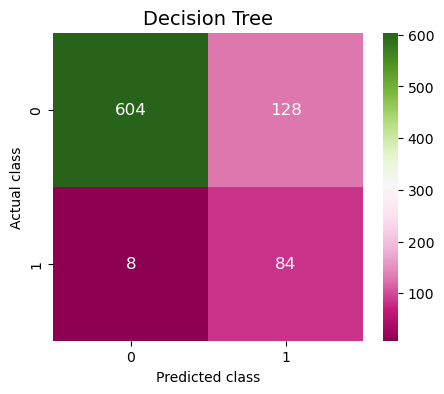

In [48]:
# Evaluate the model
print(f"Classification Report for Decision Tree:\n{classification_report(y_test_dt, y_pred_dt)}")

# Display Logistic Regression model evaluation metrics
print("Decision Tree Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_dt, y_pred_dt)}")
print(f"Precision: {precision_score(y_test_dt, y_pred_dt)}")
print(f"Recall: {recall_score(y_test_dt, y_pred_dt)}")
print(f"F1 Score: {f1_score(y_test_dt, y_pred_dt)}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test_dt, y_pred_dt)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="PiYG", annot_kws={"fontsize":12})
plt.title("Decision Tree", fontsize=14)
plt.xlabel("Predicted class")
plt.ylabel("Actual class")

Dari heatmap confusion matrix didapatkan:
- True Negative = 604 (diprediksi tidak akan mengikuti dan benar tidak mengikuti) 
- False Negative = 8 (diprediksi tidak akan mengikuti akan tetapi mengikuti (subscribed)) 
- True Positive = 84 (diprediksi akan mengikuti (subscribed) dan benar mengikuti (subscribed)) 
- False Positive = 128  (diprediksi akan mengikuti (subscribed) akan tetapi tidak mengikuti)

Dan didapatkan nilai f1-score untuk kelas positif `1` atau `"yes"` adalah 0.55.

# Random Forest 

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

# Upsample the minority class using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_rf, y_train_rf = ros.fit_resample(X_train_rf, y_train_rf)

# Create a Decision Tree model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the upsampled training data
rf_model.fit(X_train_rf, y_train_rf)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_rf)

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       732
           1       0.62      0.55      0.59        92

    accuracy                           0.91       824
   macro avg       0.78      0.76      0.77       824
weighted avg       0.91      0.91      0.91       824

Random Forest Model Evaluation:
Accuracy: 0.912621359223301
Precision: 0.6219512195121951
Recall: 0.5543478260869565
F1 Score: 0.5862068965517241


Text(33.22222222222222, 0.5, 'Actual class')

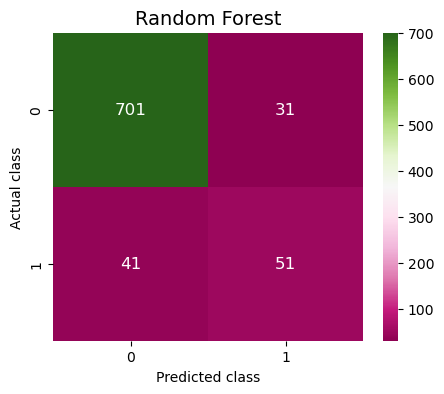

In [50]:
# Evaluate the model
print(f"Classification Report for Random Forest:\n{classification_report(y_test_rf, y_pred_rf)}")

# Display Logistic Regression model evaluation metrics
print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_rf, y_pred_rf)}")
print(f"Precision: {precision_score(y_test_rf, y_pred_rf)}")
print(f"Recall: {recall_score(y_test_rf, y_pred_rf)}")
print(f"F1 Score: {f1_score(y_test_rf, y_pred_rf)}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test_rf, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="PiYG", annot_kws={"fontsize":12})
plt.title("Random Forest", fontsize=14)
plt.xlabel("Predicted class")
plt.ylabel("Actual class")

Dari heatmap confusion matrix didapatkan:
- True Negative = 701 (diprediksi tidak akan mengikuti dan benar tidak mengikuti) 
- False Negative = 41 (diprediksi tidak akan mengikuti akan tetapi mengikuti (subscribed)) 
- True Positive = 51 (diprediksi akan mengikuti (subscribed) dan benar mengikuti (subscribed)) 
- False Positive = 31  (diprediksi akan mengikuti (subscribed) akan tetapi tidak mengikuti)

Dan didapatkan nilai f1-score untuk kelas positif `1` atau `"yes"` adalah 0.59.

# Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_nb, y_train_nb)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test_nb)

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       732
           1       0.40      0.58      0.47        92

    accuracy                           0.85       824
   macro avg       0.67      0.73      0.69       824
weighted avg       0.88      0.85      0.87       824

Naive Bayes Model Evaluation:
Accuracy: 0.8543689320388349
Precision: 0.39552238805970147
Recall: 0.5760869565217391
F1 Score: 0.4690265486725663


Text(33.22222222222222, 0.5, 'Actual class')

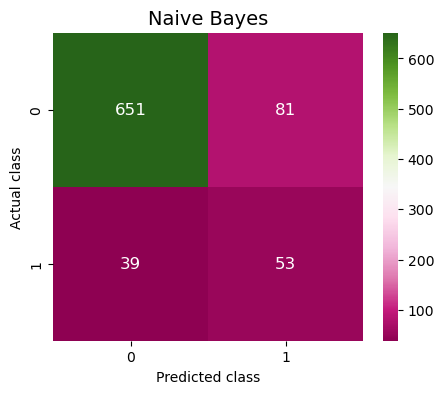

In [52]:
# Evaluate the model
print(f"Classification Report for Naive Bayes:\n{classification_report(y_test_nb, y_pred_nb)}")

# Display Logistic Regression model evaluation metrics
print("Naive Bayes Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_nb, y_pred_nb)}")
print(f"Precision: {precision_score(y_test_nb, y_pred_nb)}")
print(f"Recall: {recall_score(y_test_nb, y_pred_nb)}")
print(f"F1 Score: {f1_score(y_test_nb, y_pred_nb)}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test_nb, y_pred_nb)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="PiYG", annot_kws={"fontsize":12})
plt.title("Naive Bayes", fontsize=14)
plt.xlabel("Predicted class")
plt.ylabel("Actual class")

Dari heatmap confusion matrix didapatkan:
- True Negative = 651 (diprediksi tidak akan mengikuti dan benar tidak mengikuti) 
- False Negative = 39 (diprediksi tidak akan mengikuti akan tetapi mengikuti (subscribed)) 
- True Positive = 53 (diprediksi akan mengikuti (subscribed) dan benar mengikuti (subscribed)) 
- False Positive = 81  (diprediksi akan mengikuti (subscribed) akan tetapi tidak mengikuti)

Dan didapatkan nilai f1-score untuk kelas positif `1` atau `"yes"` adalah 0.47.

# Model Selection

Pemilihan algoritma berdasarkan:
- F1-score adalah rata-rata harmonik antara precision dan recall.
- Precision adalah banyak prediksi TP dibagi dengan jumlah dari prediksi positif (TP+FP). Ini mengukur akurasi dari prediksi positif.
- Recall adalah banyak dari prediksi TP dibagi dengan jumlah dari positif yang asli (actual) (TP+FN). Ini mengukur kemampuan model untuk menangkap semua kejadian positif.

Dengan memaksimalkan F1-score, kita akan menemukan keseimbangan antara meminimalkan FP (precision) dan meminimalkan FN (recall) untuk kelas positif `“yes”`. F1-score yang lebih tinggi menunjukkan trade-off yang lebih baik antara precision dan recall, yang menyiratkan kinerja yang lebih baik dalam meminimalkan kedua jenis kesalahan (False) tersebut.

Oleh karena itu, pemilihan algoritma dengan performa terbaik dipilih berdasarkan F1-score yang paling besar nilainya untuk kelas positif `1` atau `"yes"`.

Dari evaluasi di atas didapatkan informasi:
- `Logistic Regression`: nilai f1-score untuk kelas positif `1` atau `"yes"` adalah 0.55. Dengan FN = 13 dan FP = 118.
- `KNN`: nilai f1-score untuk kelas positif `1` atau `"yes"` adalah 0.46. Dengan FN = 27 dan FP = 126.
- `SVM`: nilai f1-score untuk kelas positif `1` atau `"yes"` adalah 0.54. Dengan FN = 14 dan FP = 119.
- `Decision Tree`: nilai f1-score untuk kelas positif `1` atau `"yes"` adalah 0.55. Dengan FN = 8 dan FP = 128.
- `Random Forest`:nilai f1-score untuk kelas positif `1` atau `"yes"` adalah 0.59. Dengan FN = 41 dan FP = 31.
- `Naive Bayes`: nilai f1-score untuk kelas positif `1` atau `"yes"` adalah 0.47. Dengan FN = 39 dan FP = 53.

Maka algoritma yang akan dipilih adalah algoritma `Random Forest`

# Final Training 

Setelah algoritma dipilih, akan di-training kembali menggunakan data keseluruhan `bank-additional-full.csv` yang disimpan dalam `df2`

In [53]:
from sklearn.ensemble import RandomForestClassifier
# X contains features and y contains the target variable
X = df1.drop('y', axis=1)
y = df1['y']

# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

# Upsample the minority class using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_rf, y_train_rf = ros.fit_resample(X_train_rf, y_train_rf)

# Create a Decision Tree model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the upsampled training data
rf_model.fit(X_train_rf, y_train_rf)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_rf)

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7265
           1       0.60      0.62      0.61       971

    accuracy                           0.91      8236
   macro avg       0.78      0.78      0.78      8236
weighted avg       0.91      0.91      0.91      8236

Random Forest Model Evaluation:
Accuracy: 0.9073579407479359
Precision: 0.603585657370518
Recall: 0.6240988671472708
F1 Score: 0.6136708860759493


Text(33.22222222222222, 0.5, 'Actual class')

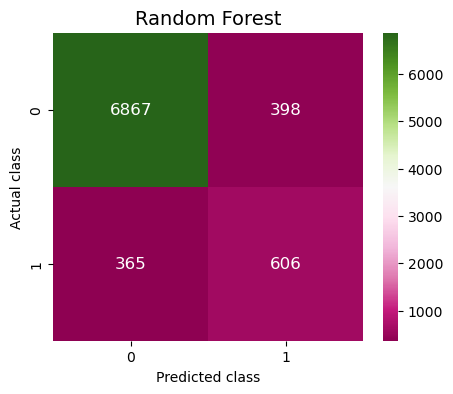

In [54]:
# Evaluate the model
print(f"Classification Report for Random Forest:\n{classification_report(y_test_rf, y_pred_rf)}")

# Display Logistic Regression model evaluation metrics
print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_rf, y_pred_rf)}")
print(f"Precision: {precision_score(y_test_rf, y_pred_rf)}")
print(f"Recall: {recall_score(y_test_rf, y_pred_rf)}")
print(f"F1 Score: {f1_score(y_test_rf, y_pred_rf)}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test_rf, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="PiYG", annot_kws={"fontsize":12})
plt.title("Random Forest", fontsize=14)
plt.xlabel("Predicted class")
plt.ylabel("Actual class")

# Conclusion

Berdasarkan seluruh rangkaian yang telah dilakukan maka dapat disimpulkan:
- Bahwa 11.3% (4639) memilih mengikuti deposito berjangka bank dan 88.7% (36537) lainnya memilih tidak mengikuti.
- Usia rata-rata dari nasabah adalah 40.02380 &asymp; 40, dengan usia termuda 17 tahun dan usia tertua 98 tahun.
- Pada kelas `no`, rata-rata durasi telepon terakhir dari nasabah yang memilih untuk tidak mengikuti deposito berjangka bank adalah 220.868079 dan pada kelas `yes`, rata-rata durasi telepon terakhir dari nasabah yang memilih untuk mengikuti deposito berjangka bank adalah 553.256090.
- Pekerjaan yang paling banyak memilih untuk mengikuti deposito berjangka bank (bank term deposit subscriptions) adalah admin, technician, blue-collar.
- Algoritma terbaik dalam kasus ini berdasarkan F1-score untuk kelas positif `1` atau `"yes"` adalah algoritma Random Forest dengan nilai 0.61 (dengan keseluruhan data).